In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import string
from sklearn import svm
from sklearn.preprocessing import LabelEncoder as le
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import seaborn as sns
import tensorflow_hub as hub
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.svm import SVC
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import classification_report

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import csv
fake = pd.read_csv("/content/Fake.csv" )
true=  pd.read_csv("/content/True.csv" )

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#Counting by Subjects 
for key,count in fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#total rows
print(f"Total Records:\t{fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


In [ ]:
#Counting by Subjects 
for key,count in true.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
# Total Rows
print(f"Total Records:\t{true.shape[0]}")

politicsNews:	11272
worldnews:	10145
Total Records:	23481


In [ ]:
 emptyt=[index for index,text in enumerate(true.text.values) if str(text).strip() == '']
 print(f"No of empty rows: {len(emptyt)}")
 print(f"No of  total rows: {len(true.text.values)}")

No of empty rows: 1
No of  total rows: 21417


In [ ]:
true=true[true["text"].str.strip() !=''] 
print(f"No of  total rows: {len(true.text.values)}")
true

No of  total rows: 21416


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
 emptyf=[index for index,text in enumerate(fake.text.values) if str(text).strip() == '']
 print(f"No of empty rows: {len(emptyf)}")
 print(f"No of total rows: {len(fake.text.values)}")

No of empty rows: 630
No of total rows: 23481


In [ ]:
true['From'] = true['text'].str.split('-' , 1).str[0]
true['text'] = true['text'].str.split('-' , 1).str[1]
true

,title,text,subject,date,From
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Don...,worldnews,"August 22, 2017",BRUSSELS (Reuters)
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory a...",worldnews,"August 22, 2017",LONDON (Reuters)
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories...,worldnews,"August 22, 2017",MINSK (Reuters)
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Pa...,worldnews,"August 22, 2017",MOSCOW (Reuters)


In [ ]:
true=true[true["text"].str.strip() !=''] 
print(f"No of  total rows: {len(true.text.values)}")
true

No of  total rows: 21416


,title,text,subject,date,From
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fi...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links be...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos to...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Pos...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Don...,worldnews,"August 22, 2017",BRUSSELS (Reuters)
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory a...",worldnews,"August 22, 2017",LONDON (Reuters)
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories...,worldnews,"August 22, 2017",MINSK (Reuters)
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Pa...,worldnews,"August 22, 2017",MOSCOW (Reuters)


In [ ]:
true['num'] = 1
fake['num'] = 0


data = pd.concat([fake, true])

data

,title,text,subject,date,num,From
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,NaN
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Don...,worldnews,"August 22, 2017",1,BRUSSELS (Reuters)
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory a...",worldnews,"August 22, 2017",1,LONDON (Reuters)
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories...,worldnews,"August 22, 2017",1,MINSK (Reuters)
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Pa...,worldnews,"August 22, 2017",1,MOSCOW (Reuters)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


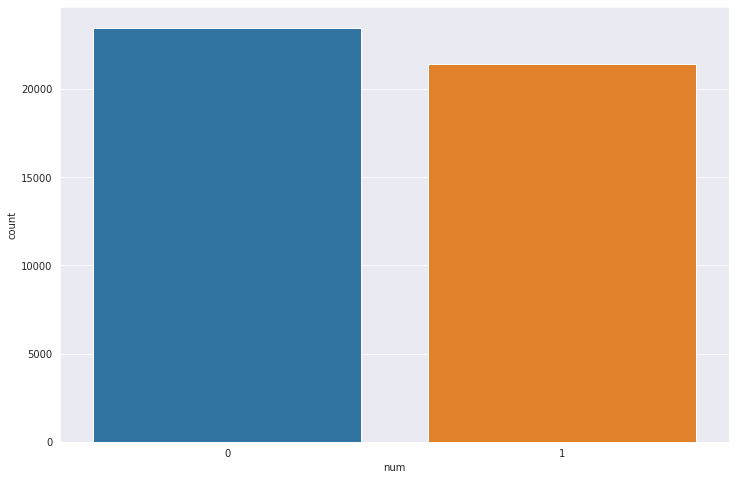

In [ ]:
plt.figure(figsize = (12,8))
sns.set_style("darkgrid")
sns.countplot(data.num)
plt.show()
# by_tf = data.num.value_counts()
# by_tf.plot(kind='bar')

([<matplotlib.patches.Wedge at 0x7fbe9438c050>,
 [Text(-0.07940308901384703, 1.0971304158827515, '0'),
  Text(0.0794030890138464, -1.0971304158827515, '1')],
 [Text(-0.04331077582573474, 0.5984347722996826, '52.3%'),
  Text(0.0433107758257344, -0.5984347722996826, '47.7%')])

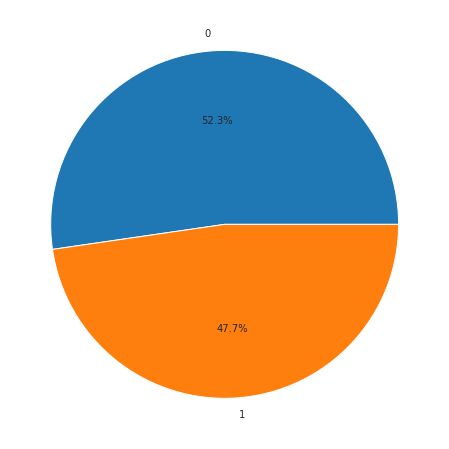

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(data["num"].value_counts().values,explode=[0,0],labels=data.num.value_counts().index, autopct='%1.1f%%')

In [ ]:
# data.isna().sum()
# data.title.count()
data.subject.value_counts()

politicsNews       11271
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

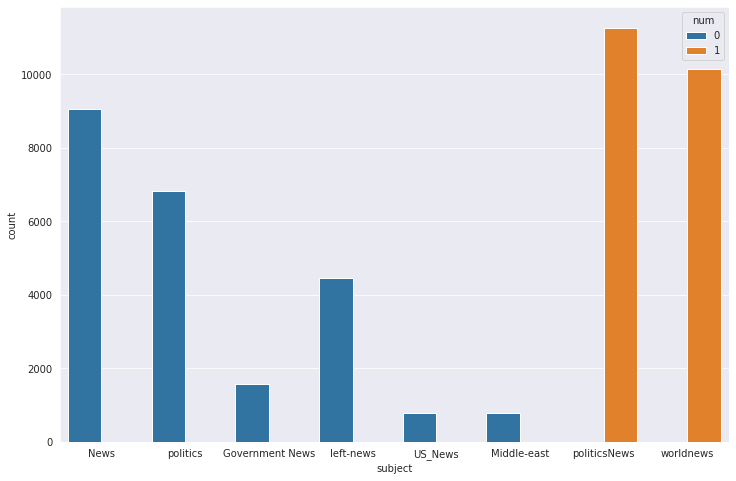

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x="subject",  hue='num', data=data)

# Cleaning

In [ ]:
patternDel = "http"
filter1 = data['date'].str.contains(patternDel)
data = data[~filter1]
# Διαγράφω ο,τι είναι link.

In [ ]:
pattern = "Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec"
filter2 = data['date'].str.contains(pattern)
data = data[filter2]

In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data = data.fillna("")
data.head(15000)

,title,text,subject,date,num,From
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,0,
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,0,
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,0,
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,0,
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,0,
...,...,...,...,...,...,...
14996,Jimmy Kimmel’s Hysterical Take On The Republic...,This video pretty much sums up the Republican ...,politics,2015-10-31,0,
14997,THE STATE OF OUR NATION Is Perfectly Illustrat...,The 12 funniest halloween memes in no particul...,politics,2015-10-31,0,
14998,MEDIA LIE EXPOSED: Hundreds Of Students Rally ...,We shared our Game Changer story with you ea...,politics,2015-10-31,0,
14999,CNBC DEBATE HACK Proves Allegiance To Democrat...,By looking at the two Democrat presidential ca...,politics,2015-10-31,0,


In [ ]:
datasub=data.groupby(['subject', 'num'])['text'].count()
datasub = datasub.unstack().fillna(0)
datasub

num,0,1
subject,,
Government News,1568.0,0.0
Middle-east,778.0,0.0
News,9050.0,0.0
US_News,783.0,0.0
left-news,4456.0,0.0
politics,6836.0,0.0
politicsNews,0.0,11271.0
worldnews,0.0,10145.0


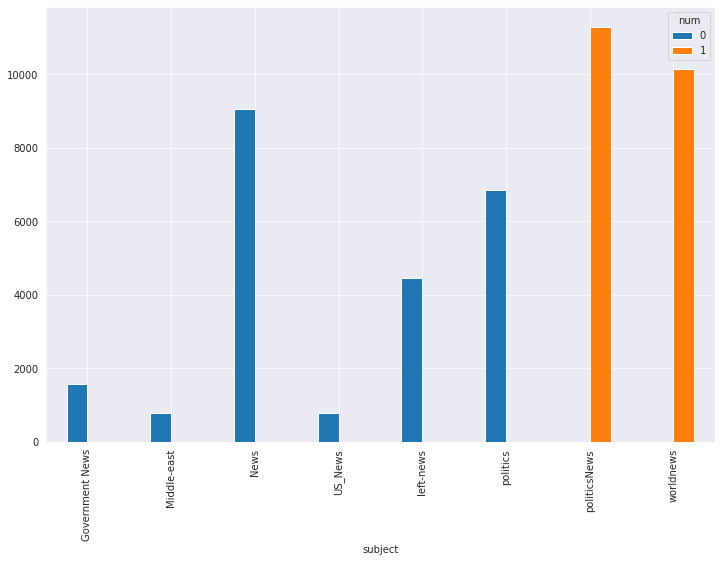

In [ ]:
ax = datasub.plot(kind = 'bar', figsize = (12,8), grid = True)
plt.show()

In [ ]:
data_ = data.copy()
data_ = data_.sort_values(by = ['date'])
data_ = data_.reset_index(drop=True)
data_

# Σορτάρισμα με βάση ημερομηνία

,title,text,subject,date,num,From
0,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,0,
1,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,2015-03-31,0,
2,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,0,
3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",left-news,2015-03-31,0,
4,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,left-news,2015-03-31,0,
...,...,...,...,...,...,...
44882,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,2018-02-18,0,
44883,GOTCHA! A Stammering John Podesta Stunned by a...,John Podesta is Hillary Clinton s former campa...,politics,2018-02-18,0,
44884,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,2018-02-19,0,
44885,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,2018-02-19,0,


In [ ]:
# Μετράω τα fake news ανα ημέρα
dataf = data_[data_['num'] == 0]
dataf = dataf.groupby(['date'])['num'].count()
f = pd.DataFrame(dataf)
f

,num
date,
2015-03-31,8
2015-04-01,2
2015-04-02,1
2015-04-04,5
2015-04-05,13
...,...
2018-02-15,9
2018-02-16,8
2018-02-17,7


In [ ]:
# Μετράω τα real news ανα ημέρα
datat = data_[data_['num'] == 1]
datat = datat.groupby(['date'])['num'].count()
t = pd.DataFrame(datat)
t

,num
date,
2016-01-13,30
2016-01-14,15
2016-01-15,23
2016-01-16,5
2016-01-17,3
...,...
2017-12-27,63
2017-12-28,5
2017-12-29,6


In [ ]:
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.graph_objs as go

plot_data = [
    go.Scatter(
        x=t.index,
        y=t['num'],
        name='True',
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=f.index,
        y=f['num'],
        name='Fake'
    )
    
]
plot_layout = go.Layout(
        title='Day-wise',
        yaxis_title='Number',
        xaxis_title='Time',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
# plt.figure(figsize = (20,20)) # Text that is not Real
# wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(data[data.num == 1].text))
# plt.axis("off")
# plt.imshow(wc , interpolation = 'bilinear')
# plt.show()

In [ ]:
# plt.figure(figsize = (20,20)) # Text that is not Real
# wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(data[data.num == 0].text))
# plt.axis("off")
# plt.imshow(wc , interpolation = 'bilinear')
# plt.show()

In [ ]:
stopwords = nltk.corpus.stopwords.words("english")

# Καθαρίζει τα κείμενα στο 'text' από τα σημεία στίξης,παρενθέσεις κτλ
def precleaning(x):
    f = x
    f = f.lower()
    f = re.sub('\[.*?\]', '', f) 
    f = re.sub(r'[^\w\s]','',f) 
    f = re.sub('\w*\d\w*', '', f) 
    f = re.sub(r'http\S+', '', f)
    f = re.sub('\n', '', f)
    return f

# Αφαιρεί τις stopwords
def remove_stopwords(text):
    token_text = nltk.word_tokenize(text)
    removed = [word for word in token_text if word not in stopwords]
    joinedtext = ' '.join(removed)
    return joinedtext

# Συνολικό καθάρισμα
def cleaning(text):
    text = precleaning(text)
    text = remove_stopwords(text)
    return text

new_data = data_.copy()
new_data['text'] = data_.text.apply(lambda x : cleaning(x))
del new_data['From']
new_data.head()

,title,text,subject,date,num
0,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,nothing like political cronyism make stomach c...,politics,2015-03-31,0
1,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,irony lost us hillary compared president wante...,politics,2015-03-31,0
2,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,anyone really think hillary clinton come clean...,politics,2015-03-31,0
3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,case missed sen harry reid rnv announced last ...,left-news,2015-03-31,0
4,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,irony lost us hillary compared president wante...,left-news,2015-03-31,0


In [ ]:
new_data.head(12500)

,title,text,subject,date,num
0,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,nothing like political cronyism make stomach c...,politics,2015-03-31,0
1,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,irony lost us hillary compared president wante...,politics,2015-03-31,0
2,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,anyone really think hillary clinton come clean...,politics,2015-03-31,0
3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,case missed sen harry reid rnv announced last ...,left-news,2015-03-31,0
4,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,irony lost us hillary compared president wante...,left-news,2015-03-31,0
...,...,...,...,...,...
12495,Former Trump Staffer Suing After Campaign Dir...,former staffer donald trump presidential campa...,News,2016-08-11,0
12496,"Trump Doubles Down, Says Obama LITERALLY Crea...",completely unhinged speech florida trump claim...,News,2016-08-11,0
12497,Republican Steve King Gives Hillary SHOCKING ...,gop congressman steve king ria endorsed republ...,News,2016-08-11,0
12498,"Ex-Trump staffer sues campaign, alleges gun in...",former north carolina staffer suing donald tru...,politicsNews,2016-08-11,1


In [ ]:
a = pd.DataFrame(new_data.text)
a.head()

,text
0,nothing like political cronyism make stomach c...
1,irony lost us hillary compared president wante...
2,anyone really think hillary clinton come clean...
3,case missed sen harry reid rnv announced last ...
4,irony lost us hillary compared president wante...


In [ ]:
# stopwords = set(STOPWORDS)

def common_tokens_title(data, feature, name):
    column = data[feature].str.lower() 
    text = ' '.join(column)
    exclude = set(string.punctuation)
    words = ''.join(char for char in text if char not in exclude)
    words_splitted = words.split()
    words_stopped = [word for word in words_splitted if not word in stopwords]
    print(f'{name}:\n{pd.DataFrame(nltk.FreqDist(words_stopped).most_common(10))[0]}')
    
common_tokens_title(true, 'title', 'Most common descriptive words in Real News Titles')
print('\n')
common_tokens_title(fake, 'title', 'Most common descriptive words in Fake News Titles')
print('\n')
common_tokens_title(new_data, 'title', 'Most common descriptive words in Combined News Titles')

Most common descriptive words in Real News Titles:
0     trump
1        us
2      says
3     house
4     north
5       new
6     white
7    russia
8     korea
9    senate
Name: 0, dtype: object


Most common descriptive words in Fake News Titles:
0        video
1        trump
2        watch
3        obama
4      hillary
5      trump’s
6    president
7           us
8      clinton
9          new
Name: 0, dtype: object


Most common descriptive words in Combined News Titles:
0      trump
1      video
2         us
3       says
4      obama
5      house
6      watch
7    hillary
8        new
9      white
Name: 0, dtype: object


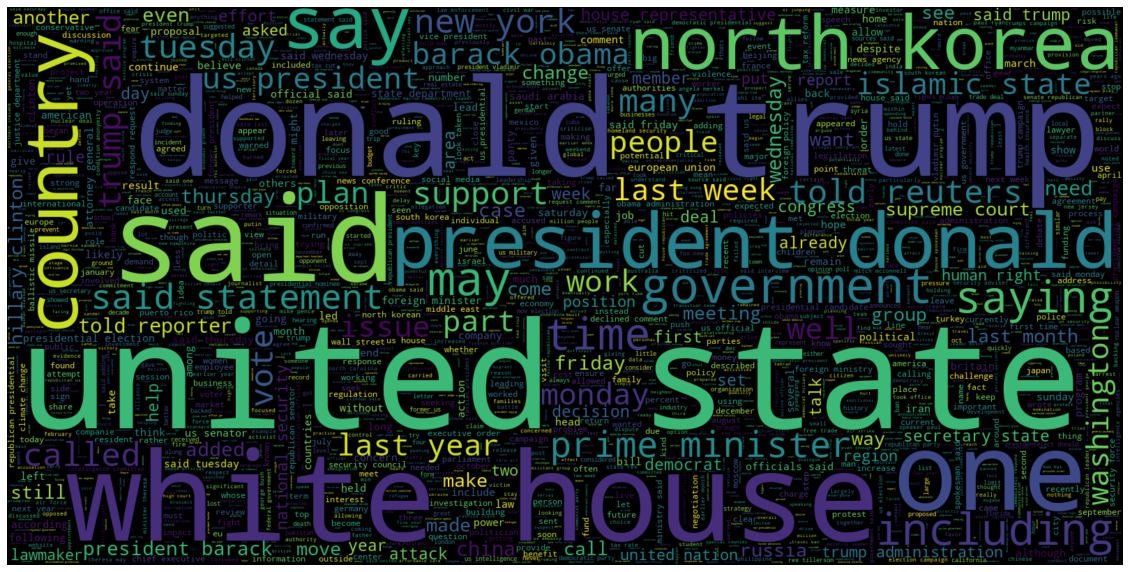

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(new_data[new_data.num == 1].text))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')
plt.show()

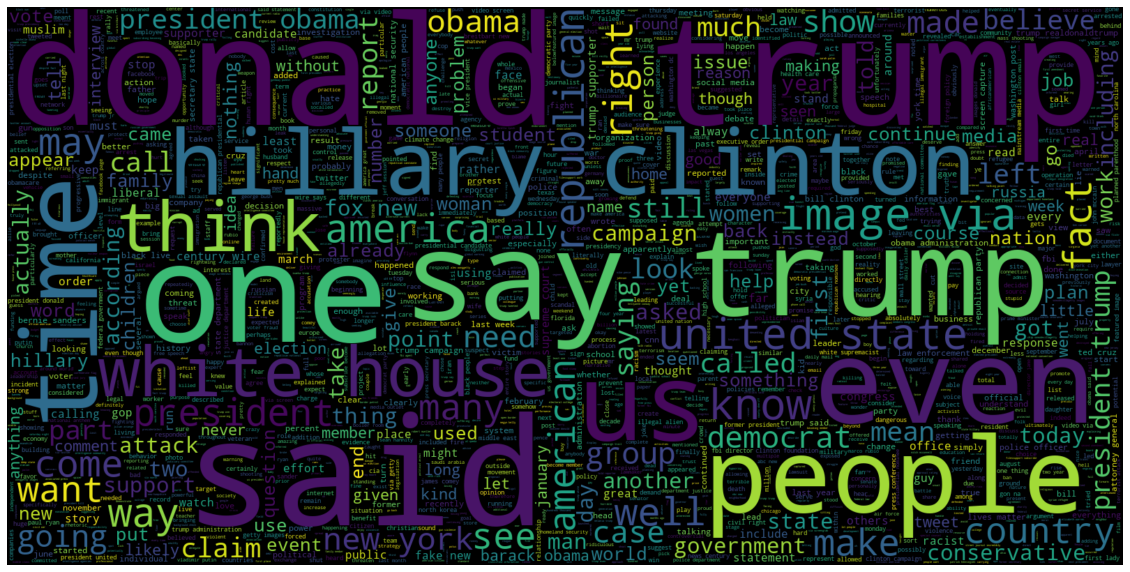

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(new_data[new_data.num == 0].text))
plt.axis("off")
plt.imshow(wc , interpolation = 'bilinear')
plt.show()

In [ ]:
def get_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    words = vec.transform(corpus)
    total_words = words.sum(axis=0) 
    words_freq = [(word, total_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def graph_ngrams(data_set , ngrams):
    plt.figure(figsize = (16,9))
    gram = get_ngrams(data_set.text,10,ngrams)
    gram = dict(gram)
    for key in gram:
      print(key, ' : ', gram[key])
    sns.barplot(x=list(gram.values()),y=list(gram.keys()))
  

**Μπορουμε να δημιουργήσουμε μια συναρτηση(graph_ngrams) για να πλοτάρει τα δεδομένα, αντι να κάνουμε copy-paste.**

In [ ]:
# # Εμφάνιζει unigrams
graph_ngrams(new_data, 1)


# plt.figure(figsize = (16,9))
# uni = get_ngrams(new_data.text,10,1)  #Εμφανίζει τα δέκα πρώτα πιο συχνά unigrams
# uni = dict(uni)
# sns.barplot(x=list(uni.values()),y=list(uni.keys()))

In [ ]:
# # Εμφανίζει bigrams
graph_ngrams(new_data, 2)

# # plt.figure(figsize = (16,9))
# bi = get_ngrams(new_data.text,10,2)  #Εμφανίζει τα δέκα πρώτα πιο συχνά bigrams
# bi = dict(bi)
# sns.barplot(x=list(bi.values()),y=list(bi.keys()))

In [ ]:
graph_ngrams(new_data, 3)

# # plt.figure(figsize = (16,9))
# # tri = get_ngrams(new_data.text,10,3) #Εμφανίζει τα δέκα πρώτα πιο συχνά trigrams
# tri = dict(tri)
# sns.barplot(x=list(tri.values()),y=list(tri.keys()))

**Μπορούμε να βάλουμε και unigram, bigram, trigram και για τα True News(datat) και Fake News(dataf) ξεχωριστά**

In [ ]:
new_data.head()

,title,text,subject,date,num
0,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,nothing like political cronyism make stomach c...,politics,2015-03-31,0
1,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,irony lost us hillary compared president wante...,politics,2015-03-31,0
2,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,anyone really think hillary clinton come clean...,politics,2015-03-31,0
3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,case missed sen harry reid rnv announced last ...,left-news,2015-03-31,0
4,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,irony lost us hillary compared president wante...,left-news,2015-03-31,0


# Word2Vec

In [ ]:
y = new_data['num'].values
#μετατροπή του χ σε μορφή που θα μπορούμε να χρησιμοποιήσουμε
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in new_data["text"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

In [ ]:
#διαστάσεις
EMBEDDING_DIM = 100


w2v_model = gensim.models.Word2Vec(sentences=X, size=EMBEDDING_DIM, window=5, min_count=1)

In [ ]:
vocab_len = len(w2v_model.wv.vocab)
print("The number of words in the model's vocabulary:", vocab_len)

The number of words in the model's vocabulary: 200763


In [ ]:
w2v_model["trump"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



array([-2.1352947 ,  0.7199205 ,  0.09870468, -1.4719393 ,  0.03509561,
       -1.6234167 , -0.40154392, -2.0455477 , -0.6550606 ,  0.41137233,
       -1.4456716 ,  2.0745544 ,  2.6214657 ,  0.9757773 ,  1.641313  ,
        1.3933338 ,  0.6232027 , -1.5449036 ,  2.4887648 ,  1.1514238 ,
       -4.338772  , -1.135206  , -0.57851976,  0.3172989 ,  0.93272316,
        3.098771  ,  0.43665695,  0.40589604, -1.7214749 ,  0.7631897 ,
        0.25810388, -2.392025  , -2.6574445 , -1.7171133 , -2.4980617 ,
       -1.223777  ,  1.3935441 ,  2.3673313 , -0.17664877, -0.11636279,
       -1.6299887 , -0.85237724,  1.9996278 ,  0.58287084, -0.19545487,
       -1.6787413 , -4.625415  ,  0.5475728 ,  1.8307153 ,  0.4440493 ,
        1.4600354 ,  0.2043235 , -0.3002149 , -1.8738289 , -0.01841607,
        2.728253  ,  2.0678296 ,  1.3068348 , -0.46533948, -3.8403127 ,
        0.49832186,  0.57365656, -1.4411668 ,  0.91425914,  0.99626875,
       -0.18231964, -0.51315916,  0.3804969 , -1.4590348 , -1.97

In [ ]:
w2v_model["president"]

# Παραδείγματα για το πως δουλεύει το w2v_model με τις λέξεις trump και president

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



array([-1.0131015 , -1.235     ,  1.7361466 ,  0.11350176,  0.5649938 ,
        0.09772837,  2.2688954 ,  1.5704999 ,  1.1403623 ,  1.3843465 ,
        1.4473702 ,  2.1176944 , -0.94328713,  1.0873064 ,  1.2533708 ,
        0.3041025 ,  0.4073885 , -2.0835698 , -0.54307544, -0.10631271,
       -4.032143  , -0.3237984 , -1.6246271 , -1.7436205 ,  0.01249237,
        0.98582727,  0.8698598 ,  0.78361154, -1.8574607 ,  1.7497518 ,
        1.8638618 , -3.939009  ,  0.43115044,  0.28593075, -2.550002  ,
        0.885805  ,  0.2199149 ,  2.2244644 , -0.68250895,  2.3784058 ,
       -1.2742579 , -1.9865618 ,  1.693201  , -0.87919766, -1.1524237 ,
       -1.5610812 , -0.965606  , -0.22126524,  2.1606596 ,  2.9223812 ,
        3.1327229 , -1.8847432 , -3.2357726 , -3.5241883 ,  1.128215  ,
        1.8361595 , -1.5730778 ,  2.6851277 ,  1.4598726 , -0.7614637 ,
        0.5031893 ,  1.4374622 , -0.5619389 ,  1.8097047 , -0.04976461,
        1.3304225 ,  1.875354  , -1.1960537 ,  0.07240289, -0.63

In [ ]:
w2v_model.wv.most_similar("trump")

[('trumps', 0.793054461479187),
 ('presidentelect', 0.6561252474784851),
 ('trumptrump', 0.5490508079528809),
 ('obama', 0.5305221080780029),
 ('temperstephen', 0.5148158073425293),
 ('expectit', 0.5089560747146606),
 ('rumsfeldfeatured', 0.5030982494354248),
 ('catastrophicwatch', 0.5007514953613281),
 ('trumpbuffett', 0.5006222724914551),
 ('trumpit', 0.4938005208969116)]

In [ ]:
w2v_model.wv.most_similar("york")

[('yorker', 0.7519768476486206),
 ('jersey', 0.7509508728981018),
 ('jerseycom', 0.7434698343276978),
 ('yorks', 0.725242555141449),
 ('jerseyans', 0.7201768159866333),
 ('yorkpolitico', 0.7143055200576782),
 ('delhi', 0.7072934508323669),
 ('hampshires', 0.701617956161499),
 ('yorkborn', 0.7000288963317871),
 ('yorkfeatured', 0.6993271112442017)]

In [ ]:
w2v_model.wv.most_similar("news")

# Εύρεση λέξεων που "μοιάζουν" με τις λέξεις trump, york, news

[('newsit', 0.7160006761550903),
 ('newsthe', 0.6918847560882568),
 ('newsyou', 0.6907891035079956),
 ('newsmeanwhile', 0.6635937690734863),
 ('newswouldn', 0.663037896156311),
 ('newswatch', 0.661396861076355),
 ('atlantafeatured', 0.6556539535522461),
 ('debatedespite', 0.6543418765068054),
 ('jokeimage', 0.6532645225524902),
 ('newsbut', 0.6360870599746704)]

In [ ]:
new_data.head()

,title,text,subject,date,num
0,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,nothing like political cronyism make stomach c...,politics,2015-03-31,0
1,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,irony lost us hillary compared president wante...,politics,2015-03-31,0
2,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,anyone really think hillary clinton come clean...,politics,2015-03-31,0
3,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,case missed sen harry reid rnv announced last ...,left-news,2015-03-31,0
4,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,irony lost us hillary compared president wante...,left-news,2015-03-31,0


# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(new_data['text'], 
                                                    new_data['num'], 
                                                    test_size = 0.4,
                                                    random_state=0)


In [ ]:
vect = CountVectorizer().fit(X_train)

# Μετατρέπει ό,τι έιναι μορφή text σε δίανυσμα

In [ ]:

X_train_vectorized = vect.transform(X_train)

X_train_vectorized


<26932x155280 sparse matrix of type '<class 'numpy.int64'>'
	with 4292210 stored elements in Compressed Sparse Row format>

In [ ]:
%%time

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
# Εκπάιδευση του μοντέλου με Logistic Regression

CPU times: user 8.56 s, sys: 8.51 s, total: 17.1 s
Wall time: 8.82 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
%%time

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

# ROC curve = γράφος που δείχνει την απόδοση του classification
# AUC:Area Under the ROC Curve

AUC:  0.983412592148469
CPU times: user 3.52 s, sys: 62.1 ms, total: 3.58 s
Wall time: 3.55 s


In [ ]:
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))  # true = 1, fake = 0 . Εκτυπώνει [[TN,FP][FN,TP]]
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))

[[9168  157]
 [ 141 8489]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9325
           1       0.98      0.98      0.98      8630

    accuracy                           0.98     17955
   macro avg       0.98      0.98      0.98     17955
weighted avg       0.98      0.98      0.98     17955



The accuracy of the prediction is 98.34%.

The F1 score is 0.983.



(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbe6a2eac10>)

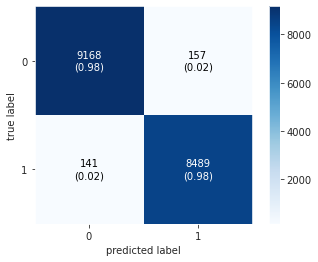

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

acc = metrics.accuracy_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions,pos_label=1)

print('The accuracy of the prediction is {:.2f}%.\n'.format(acc*100))
print('The F1 score is {:.3f}.\n'.format(f1))

cmatrix = confusion_matrix(y_test, predictions , labels=[0, 1])
plot_confusion_matrix(cmatrix,
                      show_normed=True, colorbar=True,
                      )


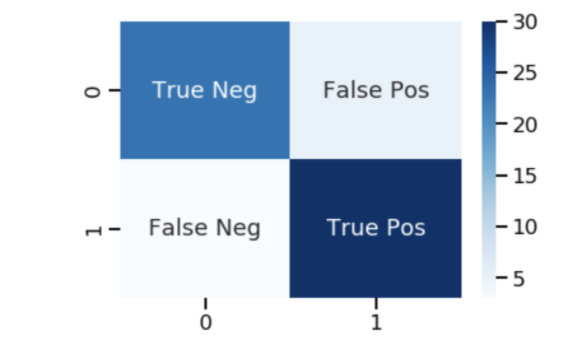


Text(0.5, 15.0, 'predictions')

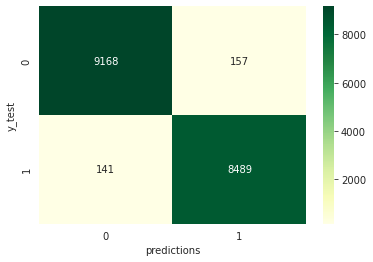

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions , labels=[0, 1])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax, fmt='d', cmap="YlGn")
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

Να κρατήσουμε ένα απο τα δύο confusion matrixes

In [ ]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefficients:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefficients: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



Smallest Coefficients:
['via' 'rep' 'daily' 'gop' 'mr' 'wire' 'press' 'anyone' 'image' 'read']

Largest Coefficients: 
['link' 'trumps' 'thursday' 'wednesday' 'tuesday' 'friday' 'monday'
 'thats' 'dont' 'said']


## Neural Networks

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=1000)


# Μετατρέπει τα text σε tokens. 


In [ ]:
word_index = tokenizer.word_index 
vocab_size = len(word_index) + 1
#Get the weight matrix for embedding layer
def get_weight(model,word_index):
    weight_matrix = np.zeros((vocab_size,EMBEDDING_DIM ))
    for word, index in word_index.items():
        weight_matrix[index]=model[word]
    return weight_matrix

emb_vec = get_weight(w2v_model.wv,word_index)

print(emb_vec)

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights = [emb_vec], input_length=1000,trainable=False),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
nn_model.summary



In [ ]:
history = nn_model.fit(x_train,y_train,epochs=2,validation_data=(x_test,y_test),batch_size=128)
classification_result = nn_model.evaluate(x_test,y_test)
print("test loss, test acc:",classification_result)

# SVM

In [ ]:

X=new_data['text'].to_list()
y=new_data['num'].to_list()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=10)
Vectorizer = TfidfVectorizer(max_df=0.9,ngram_range=(1, 2))
TfIdf=Vectorizer.fit(X_train)
X_train=TfIdf.transform(X_train)

In [ ]:
%%time
model =svm.LinearSVC(C=0.1)
model.fit(X_train,y_train)

CPU times: user 1.77 s, sys: 97 ms, total: 1.87 s
Wall time: 1.86 s


In [ ]:
%%time
X_test=TfIdf.transform(X_test)
y_pred=model.predict(X_test)
svm_acc = metrics.accuracy_score(y_test, y_pred)
print('The accuracy of the prediction is {:.2f}%.\n'.format(svm_acc*100))

The accuracy of the prediction is 98.28%.

CPU times: user 6.62 s, sys: 29.9 ms, total: 6.65 s
Wall time: 6.64 s


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4691
           1       0.98      0.99      0.98      4287

    accuracy                           0.98      8978
   macro avg       0.98      0.98      0.98      8978
weighted avg       0.98      0.98      0.98      8978

